# Greenhouse Gases and their effect on Climate Change

The atmospheric concentrations of greenhouse gases reflect a balance between emissions from human activities, sources and sinks. Increasing levels of greenhouse gases in the atmosphere due to human activities are a major driver of climate change.

*The Big 3:*

*Carbon dioxide(CO2)* is the most commonly addressed greenhouse gas, and its atmospheric concentration is measured by parts per million(ppm). *Methane(CH4)* and *nitrous oxide(N2O)* are also extraordinarily important for the global climate and are measured by parts per billion (ppb).

In 2019, greenhouse gas concentrations reached new highs.
- Carbon dioxide: 410.5±0.2 ppm = 148% of preindustrial levels
- Methane: 1877±2 ppb = 260% of preindustrial levels
- Nitrous oxide: 332.0±0.1 ppb = 123% of pre-industrial levels.

It is important to mention that _despite_ setbacks from COVID-19, global greenhouse gas emissions *increased* in 2020.

In [4]:
import time 
import ast
import os   
import re
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import pandas as pd
import numpy as np
import requests 
import json
import requests
import bs4
from bs4 import BeautifulSoup
import scipy as sc
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

 # Crawling
 
 We explored the artical about "State of the Global Climate 2020" :
 https://storymaps.arcgis.com/stories/6942683c7ed54e51b433bbc0c50fbdea
 
 The data about the Greenhouse Gas concentration is from the website:
 https://flo.uri.sh/visualisation/4452881/embed

In [5]:
greenhouse_gas_concentrations = requests.get('https://flo.uri.sh/visualisation/4452881/embed')
type(greenhouse_gas_concentrations)

requests.models.Response

In [6]:
soup = BeautifulSoup(greenhouse_gas_concentrations.text,"html.parser")
type(soup)

bs4.BeautifulSoup

In [7]:
find_script = soup.find_all('script')[4]
find_script

<script>
		function _Flourish_unflattenInto(dest, src) {
			dest = dest || {};
			for (var k in src) {
				var t = dest;
				for (var i = k.indexOf("."), p = 0; i >= 0; i = k.indexOf(".", p = i+1)) {
					var s = k.substring(p, i);
					if (!(s in t)) t[s] = {};
					t = t[s];
				}
				t[k.substring(p)] = src[k];
			}
			return dest;
		}
		var _Flourish_settings = {"animate_on_load":true,"chart_bg.background_color":"#303030","chart_bg.background_color_enabled":true,"chart_bg.background_image_enabled":false,"chart_type":"line","color.categorical_custom_palette":"COLUMN A: #ad3b34\n","color.categorical_extend":false,"color.categorical_palette":["#1D6996","#EDAD08","#73AF48","#94346E","#38A6A5","#E17C05","#5F4690","#0F8554","#6F4070","#CC503E","#994E95","#666666"],"data_trans_bind_data_points":false,"data_trans_bind_series":false,"data_trans_duration":1000,"dot_hollow":false,"dot_mode":"on","dot_radius":0.15,"dot_radius_last":80,"facet_fixed_cols":false,"facet_header_color":null,"facet_l

In [8]:
type(find_script)

bs4.element.Tag

In [9]:
str_script = str(find_script)
str_script 

'<script>\n\t\tfunction _Flourish_unflattenInto(dest, src) {\n\t\t\tdest = dest || {};\n\t\t\tfor (var k in src) {\n\t\t\t\tvar t = dest;\n\t\t\t\tfor (var i = k.indexOf("."), p = 0; i >= 0; i = k.indexOf(".", p = i+1)) {\n\t\t\t\t\tvar s = k.substring(p, i);\n\t\t\t\t\tif (!(s in t)) t[s] = {};\n\t\t\t\t\tt = t[s];\n\t\t\t\t}\n\t\t\t\tt[k.substring(p)] = src[k];\n\t\t\t}\n\t\t\treturn dest;\n\t\t}\n\t\tvar _Flourish_settings = {"animate_on_load":true,"chart_bg.background_color":"#303030","chart_bg.background_color_enabled":true,"chart_bg.background_image_enabled":false,"chart_type":"line","color.categorical_custom_palette":"COLUMN A: #ad3b34\\n","color.categorical_extend":false,"color.categorical_palette":["#1D6996","#EDAD08","#73AF48","#94346E","#38A6A5","#E17C05","#5F4690","#0F8554","#6F4070","#CC503E","#994E95","#666666"],"data_trans_bind_data_points":false,"data_trans_bind_series":false,"data_trans_duration":1000,"dot_hollow":false,"dot_mode":"on","dot_radius":0.15,"dot_radius_las

In [10]:
flourish_data = str_script.split("_Flourish_data = ")[1].split(";")[0]
print(eval(flourish_data))

{'data': [{'label': '1984', 'value': ['344.3', '303.9', '1654']}, {'label': '1985', 'value': ['345.8', '304.5', '1666']}, {'label': '1986', 'value': ['347.2', '305.3', '1679']}, {'label': '1987', 'value': ['349', '305.9', '1691']}, {'label': '1988', 'value': ['351.4', '306.7', '1703']}, {'label': '1989', 'value': ['353', '307.6', '1714']}, {'label': '1990', 'value': ['354.2', '308.6', '1724']}, {'label': '1991', 'value': ['355.5', '309.3', '1735']}, {'label': '1992', 'value': ['356.2', '309.9', '1743']}, {'label': '1993', 'value': ['357', '310.1', '1746']}, {'label': '1994', 'value': ['358.6', '310.7', '1752']}, {'label': '1995', 'value': ['360.4', '311.4', '1759']}, {'label': '1996', 'value': ['362.1', '312', '1761']}, {'label': '1997', 'value': ['363.3', '312.9', '1765']}, {'label': '1998', 'value': ['366', '313.7', '1774']}, {'label': '1999', 'value': ['368', '314.6', '1782']}, {'label': '2000', 'value': ['369.5', '315.7', '1783']}, {'label': '2001', 'value': ['371', '316.4', '1782'

In [11]:
flourish_data

'{"data":[{"label":"1984","value":["344.3","303.9","1654"]},{"label":"1985","value":["345.8","304.5","1666"]},{"label":"1986","value":["347.2","305.3","1679"]},{"label":"1987","value":["349","305.9","1691"]},{"label":"1988","value":["351.4","306.7","1703"]},{"label":"1989","value":["353","307.6","1714"]},{"label":"1990","value":["354.2","308.6","1724"]},{"label":"1991","value":["355.5","309.3","1735"]},{"label":"1992","value":["356.2","309.9","1743"]},{"label":"1993","value":["357","310.1","1746"]},{"label":"1994","value":["358.6","310.7","1752"]},{"label":"1995","value":["360.4","311.4","1759"]},{"label":"1996","value":["362.1","312","1761"]},{"label":"1997","value":["363.3","312.9","1765"]},{"label":"1998","value":["366","313.7","1774"]},{"label":"1999","value":["368","314.6","1782"]},{"label":"2000","value":["369.5","315.7","1783"]},{"label":"2001","value":["371","316.4","1782"]},{"label":"2002","value":["372.9","317.1","1783"]},{"label":"2003","value":["375.3","317.7","1787"]},{"la

In [12]:
type(flourish_data)

str

In [13]:
flourish_data = flourish_data.replace('{"data":', '').replace("]}]}", "]}]")
res_data = ast.literal_eval(flourish_data)
year = []
CO2_levels = []
N2O_levels = []
CH4_levels = []
# print("greenhouse gas levels:\n")
# print("year CO2_ppm N2O_ppb CH4_ppb")
for a in res_data:
    label = a['label']
    data_value = a['value']

    year.append(a['label'])
    CO2_levels.append(data_value[0])
    N2O_levels.append(data_value[1])
    CH4_levels.append(data_value[2])
    
df_greenhouse_gas = pd.DataFrame({"year":year,"CO2_levels":CO2_levels,"N2O_levels":N2O_levels,"CH4_levels":CH4_levels})
df_greenhouse_gas

,year,CO2_levels,N2O_levels,CH4_levels
0,1984,344.3,303.9,1654
1,1985,345.8,304.5,1666
2,1986,347.2,305.3,1679
3,1987,349,305.9,1691
4,1988,351.4,306.7,1703
5,1989,353,307.6,1714
6,1990,354.2,308.6,1724
7,1991,355.5,309.3,1735
8,1992,356.2,309.9,1743
9,1993,357,310.1,1746


In [14]:
df_greenhouse_gas["CO2_levels"] = pd.to_numeric(df_greenhouse_gas["CO2_levels"])
df_greenhouse_gas["N2O_levels"] = pd.to_numeric(df_greenhouse_gas["N2O_levels"])
df_greenhouse_gas["CH4_levels"] = pd.to_numeric(df_greenhouse_gas["CH4_levels"])

In [15]:
df_greenhouse_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        36 non-null     object 
 1   CO2_levels  36 non-null     float64
 2   N2O_levels  36 non-null     float64
 3   CH4_levels  36 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [16]:
df_greenhouse_gas.describe()

,CO2_levels,N2O_levels,CH4_levels
count,36.000000,36.000000,36.000000
mean,374.091667,317.025000,1776.027778
std,19.651701,8.344318,55.825486
min,344.300000,303.900000,1654.000000
25%,356.800000,310.050000,1745.250000
50%,371.950000,316.750000,1783.000000
75%,389.475000,323.550000,1810.250000
max,410.500000,332.000000,1877.000000


#### converting the CO2 level values from *million* to *billion* 

In [17]:
df_greenhouse_gas['CO2_levels'] = df_greenhouse_gas['CO2_levels']/1000
print(df_greenhouse_gas['CO2_levels'])

0     0.3443
1     0.3458
2     0.3472
3     0.3490
4     0.3514
5     0.3530
6     0.3542
7     0.3555
8     0.3562
9     0.3570
10    0.3586
11    0.3604
12    0.3621
13    0.3633
14    0.3660
15    0.3680
16    0.3695
17    0.3710
18    0.3729
19    0.3753
20    0.3771
21    0.3792
22    0.3813
23    0.3831
24    0.3852
25    0.3868
26    0.3890
27    0.3909
28    0.3931
29    0.3958
30    0.3977
31    0.4001
32    0.4033
33    0.4056
34    0.4079
35    0.4105
Name: CO2_levels, dtype: float64


In [18]:
df_greenhouse_gas

,year,CO2_levels,N2O_levels,CH4_levels
0,1984,0.3443,303.9,1654
1,1985,0.3458,304.5,1666
2,1986,0.3472,305.3,1679
3,1987,0.3490,305.9,1691
4,1988,0.3514,306.7,1703
5,1989,0.3530,307.6,1714
6,1990,0.3542,308.6,1724
7,1991,0.3555,309.3,1735
8,1992,0.3562,309.9,1743
9,1993,0.3570,310.1,1746


In [19]:
df_greenhouse_gas.to_csv("data/greenhouse gas.csv", index=False)

# Visualization

In [20]:
df_greenhouse = df_greenhouse_gas.copy() 

In [21]:
df_greenhouse.describe()

,CO2_levels,N2O_levels,CH4_levels
count,36.000000,36.000000,36.000000
mean,0.374092,317.025000,1776.027778
std,0.019652,8.344318,55.825486
min,0.344300,303.900000,1654.000000
25%,0.356800,310.050000,1745.250000
50%,0.371950,316.750000,1783.000000
75%,0.389475,323.550000,1810.250000
max,0.410500,332.000000,1877.000000


In [22]:
df_greenhouse.mean()

year          5.511663e+141
CO2_levels     3.740917e-01
N2O_levels     3.170250e+02
CH4_levels     1.776028e+03
dtype: float64

In [23]:
df_greenhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        36 non-null     object 
 1   CO2_levels  36 non-null     float64
 2   N2O_levels  36 non-null     float64
 3   CH4_levels  36 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


# CO2 Impact

CO2 levels indicate the amount of atmospheric CO2 measured in ppm for different time horizons (1985s-2020s) under different SRES emissions and socioeconomic scenarios.

first we will study the increase in CO2 and its effect on changes in the climate. It will lead us to the next study - an increase in CO2 has been proven experimentally to produce an increase in crop yield.


Text(0, 0.5, 'CO2_levels ppb')

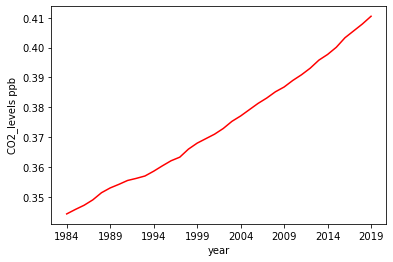

In [24]:
df_greenhouse.groupby('year').CO2_levels.mean().plot(kind='line',color='red')  #kind=line is used in order to obtain a line plot
plt.ylabel('CO2_levels ppb')

<AxesSubplot:xlabel='CO2_levels', ylabel='Density'>

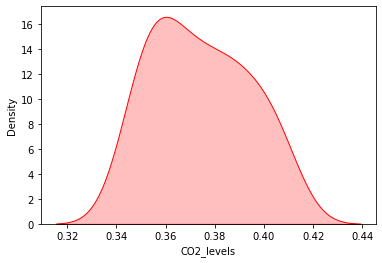

In [30]:
sns.kdeplot(df_greenhouse.CO2_levels, shade=True ,color='red')

# N2O_levels

Text(0, 0.5, 'N2O_levels ppb')

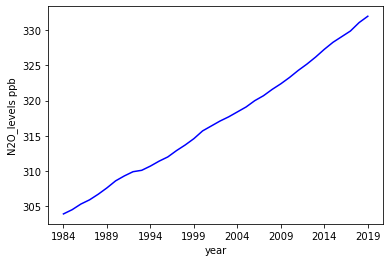

In [25]:
df_greenhouse.groupby('year').N2O_levels.mean().plot(kind='line',color='blue')  #kind=line is used in order to obtain a line plot
plt.ylabel('N2O_levels ppb')

<AxesSubplot:xlabel='N2O_levels', ylabel='Density'>

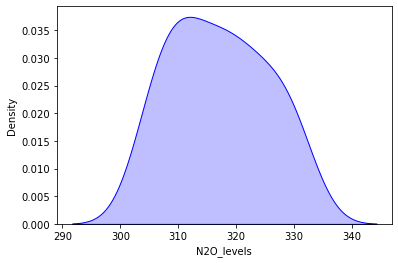

In [31]:
sns.kdeplot(df_greenhouse.N2O_levels, shade=True ,color='blue')

# CH4 Impact

Text(0, 0.5, 'CH4_levels ppb')

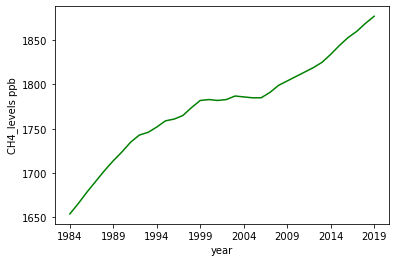

In [26]:
df_greenhouse.groupby('year').CH4_levels.mean().plot(kind='line',color='green')  #kind=line is used in order to obtain a line plot
plt.ylabel('CH4_levels ppb')

<AxesSubplot:xlabel='CH4_levels', ylabel='Density'>

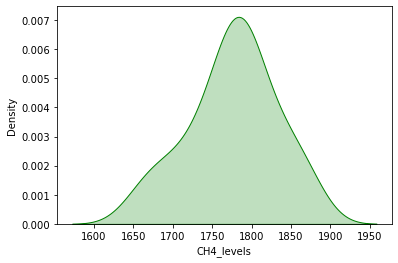

In [32]:
sns.kdeplot(df_greenhouse.CH4_levels, shade=True ,color='green')

# Simularity 
korolation and density 

Text(0, 0.5, 'ppb')

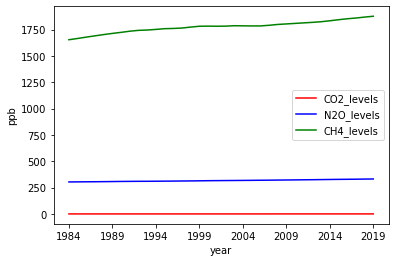

In [27]:
greenhouse=df_greenhouse.groupby(['year']).mean()[['CO2_levels','N2O_levels','CH4_levels']]
greenhouse.plot(color=['red','blue','green'])
plt.ylabel('ppb')

Text(0, 0.5, 'ppb')

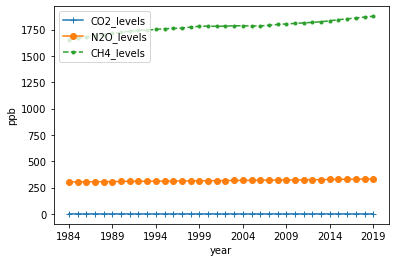

In [28]:
greenhouse=df_greenhouse.groupby(['year']).mean()[['CO2_levels','N2O_levels','CH4_levels']]
greenhouse.plot(style=['+-','o-','.--']).legend(loc='upper left', ncol=1)
plt.ylabel('ppb')

Text(0.5, 0, 'N2O & CH4 levels')

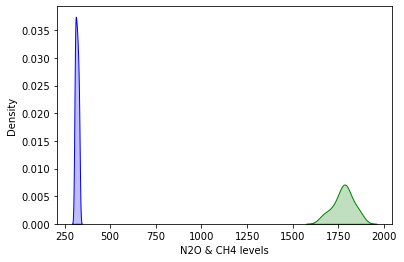

In [33]:
sns.kdeplot(df_greenhouse.N2O_levels, shade=True ,color='blue')
sns.kdeplot(df_greenhouse.CH4_levels, shade=True ,color='green')
plt.xlabel('N2O & CH4 levels')

Text(0.5, 0, 'CO2 & N2O & CH4 levels')

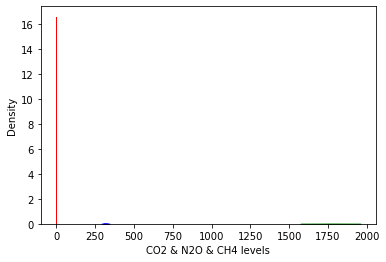

In [34]:
sns.kdeplot(df_greenhouse.N2O_levels, shade=True ,color='blue')
sns.kdeplot(df_greenhouse.CH4_levels, shade=True ,color='green')
ax = sns.kdeplot(df_greenhouse.CO2_levels, shade=True ,color='red')
plt.xlabel('CO2 & N2O & CH4 levels')

<AxesSubplot:>

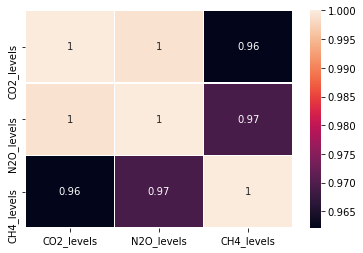

In [29]:
df_greenhouse2=df_greenhouse.copy()
df_greenhouse2=df_greenhouse2.drop(columns=['year'])
sns.heatmap(df_greenhouse2.corr(), annot=True,linewidth=0.5)